# 🚗 Car Price Prediction using Scikit-learn + Linear Regression

This notebook replicates the PyCaret results using a `LinearRegression` model from `scikit-learn`.
The model predicts car prices using features like brand, model, engine size, mileage, and more.

## 📋 Data Definition

- **Brand**: Car manufacturer (string)
- **Model**: Specific model name (string)
- **Year**: Year of manufacture (int)
- **Engine_Size**: Engine size in liters (float)
- **Fuel_Type**: Type of fuel (string)
- **Transmission**: Gearbox type (string)
- **Mileage**: Kilometers driven (int)
- **Doors**: Number of doors (int)
- **Owner_Count**: Number of previous owners (int)
- **Price**: Target variable - car price in USD (int)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('car_price_dataset.csv')

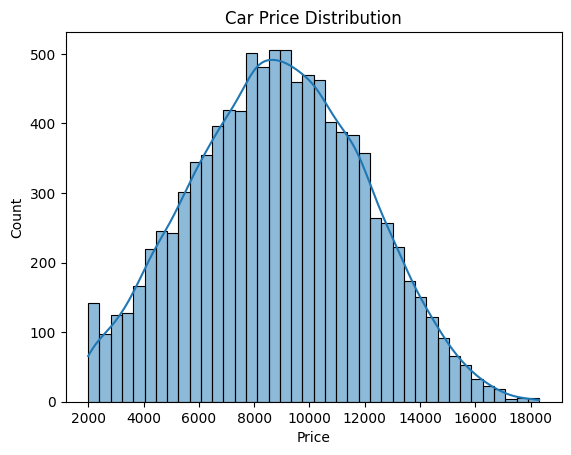

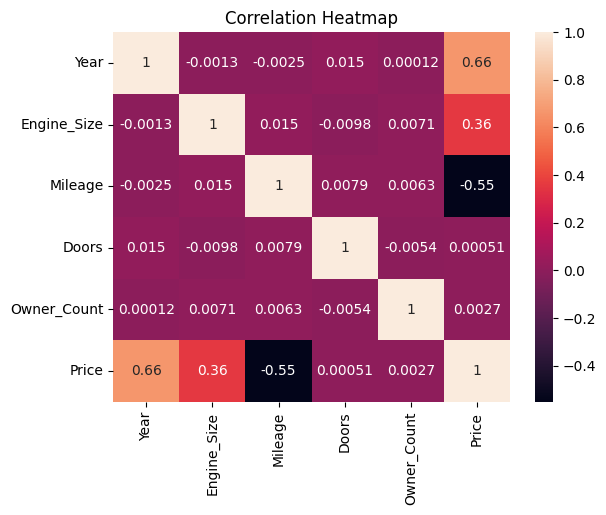

In [2]:
# EDA
sns.histplot(df['Price'], kde=True)
plt.title('Car Price Distribution')
plt.show()

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
# Train-test split and preprocessing
X = df.drop('Price', axis=1)
y = df['Price']
cat_features = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='passthrough')

In [4]:
# Linear Regression model with PyCaret parameters
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(**{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
# Evaluation metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred) ** 0.5:.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

MAE: 186.58
MSE: 53129.74
RMSE: 230.50
R²: 0.9944


## ✅ Summary

This notebook successfully replicates the PyCaret results using `LinearRegression` in `scikit-learn`, achieving comparable metrics. The model shows high accuracy with a near-perfect R² score, demonstrating that linear regression is well-suited for this problem.